среднее значение


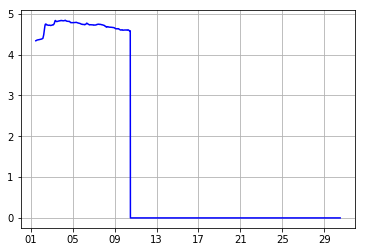

дисперсия


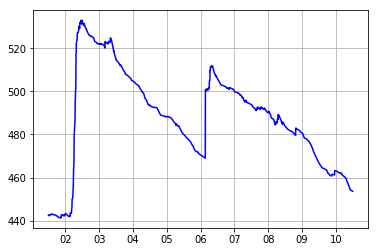

In [21]:
#задача номер 2
import csv
import pylab
import matplotlib.dates
import matplotlib.pyplot as plt
import numpy as np
import time
import datetime
%matplotlib inline
from matplotlib.pyplot import (axes,axis,title,legend,figure,
                               xlabel,ylabel,xticks,yticks,
                               xscale,yscale,text,grid,
                               plot,scatter,errorbar,hist,polar,
                               contour,contourf,colorbar,clabel,
                               imshow)
def sredznach(head, row):
    sred = 0
    time_t = int(row[0])
    #переведём данные в формат datetime
    timed =datetime.datetime.strptime(time.ctime(time_t), "%a %b %d %H:%M:%S %Y") 
    quant=[] 
    tlim=[] 
    for i in range(2, len(row)):
        if not row[i]=='':
            quant.append(float(row[i]))
        else:
            quant.append(0)
        tlim.append(int(head[i]))
    quant.sort()#массив содерж колво запросов обработ меньше чем за соотв ему время
    tlim.sort()#соответствующие пределы времени
    #print(quant)
    quantrue=[]
    
    for i in range(1, len(quant)):
        #print(quant[i], "before")
    #в данном массиве для каждого отрывка времени будет соотв ровно то количество запросов 
    #которое было обработано менее чем за соотв предел но более чем предыдущий
    #то есть мы будем рассматривать приближение при котором запросы заканчивали обработку не в определённый момент
    #времени а в промежутке tlim[i] - tlim[i-1]   
        quantrue.append(quant[i] - quant[i-1])
    #print(quantrue)
    summ=0
    for i in range(len(quantrue)):
        summ+=quantrue[i]*tlim[i]
    if not row[1]=='':
        sred=summ / float(row[1])
    #print(sred)
    return timed, sred
def dispersion(m, head, row):
    quant=[]
    tlim=[]
    for i in range(2, len(row)):
        if not row[i]=='':
            quant.append(float(row[i]))
        else:
            quant.append(0)
        tlim.append(int(head[i]))
    quant.sort()
    tlim.sort()
    #print(quant)
    quantrue=[]
    
    for i in range(1, len(quant)):
        #print(quant[i], "before")
        quantrue.append(quant[i] - quant[i-1])
    #print(quantrue)
    summ=0
    for i in range(len(quantrue)):
        summ+=quantrue[i]*((tlim[i] - m)**2)
    if not row[1]=='':
    #так как на самом деле было вычисленно не децствительное среднее а приближенное на промежутках
    #то будем вычислять дисперсию n-1
        disp=summ / (float(row[1])-1)
        return disp
def picture(x, y):
    #print("BEGIN")
    #plot(x, y)

    # Преобразуем даты в числовой формат
    xdata_float = matplotlib.dates.date2num(x)

    # Вызовем subplot явно, чтобы получить экземпляр класса AxesSubplot,
    # из которого будем иметь доступ к осям
    axes = pylab.subplot(1, 1, 1)

    # В качестве меток выведем день
    axes.xaxis.set_major_formatter(matplotlib.dates.DateFormatter("%d"))

    # Отобразим данные
    pylab.plot_date(xdata_float, y, fmt="b-")


    pylab.grid()
    pylab.show()
def csv_reader(file_obj):
    #считываем csv файл
    x=[]
    y1=[]
    y=[]
    reader = csv.reader(file_obj)
    table=[]
    for row in reader:
        table.append(row)
        if row[0] == 'timestamp':
            t0=row
        else:
            timed, sred = sredznach(t0,row)
            #print(time)
            x.append(timed)
            y.append(sred)
            disp=dispersion(sred,t0,row)
            y1.append(disp)
    #print(x)
    #print(y1)
    print("среднее значение")
    picture(x, y)
    print("дисперсия")
    picture(x, y1)

csv_path = "/Users/igorvozhga/acronis/ms_bucket.csv"
with open(csv_path, "r") as f_obj:
    data = csv_reader(f_obj)




### 